# 대략적 진행 개요

1. csv 파일 pandas를 이용해서 read_csv하기

2. adult 데이터 feature 분석하기

3. 분석한 feature에서 데이터 선별

4. 선별된 데이터에서 무의미 데이터, NaN 데이터 대체 (outlier, null)

5. 스케일러를 사용하여 데이터 전처리

6. 분류기 작성 및 학습

7. 테스트 및 평가

## 필요 모듈 import

In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score , cross_validate

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, precision_score , recall_score , f1_score , roc_auc_score , confusion_matrix

from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Binarizer

import graphviz
from sklearn.tree import export_graphviz
from IPython.display import display

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## read csv

In [2]:
%matplotlib inline

adult_train = pd.read_csv('./adult_data/adult_data.csv')
adult_test = pd.read_csv('./adult_data/adult_test.csv')
adult_train.head(3)
adult_test.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K.
6,29,?,227026,HS-grad,9,Never-married,?,Unmarried,Black,Male,0,0,40,United-States,<=50K.
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K.
8,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K.
9,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K.


## Feature Analysis

In [3]:
workclass = [' Private',' Self-emp-not-inc',' Self-emp-inc',' Federal-gov',' Local-gov',' State-gov',' Without-pay',' Never-worked.']

education = [' Bachelors',' Some-college',' 11th',' HS-grad',' Prof-school',' Assoc-acdm',' Assoc-voc',' 9th',' 7th-8th',' 12th',' Masters',' 1st-4th',' 10th',' Doctorate',' 5th-6th',' Preschool']

marital_status = [' Married-civ-spouse',' Divorced',' Never-married',' Separated',' Widowed',' Married-spouse-absent',' Married-AF-spouse']

occupation = [' Tech-support',' Craft-repair',' Other-service',' Sales',' Exec-managerial',' Prof-specialty',' Handlers-cleaners',' Machine-op-inspct',' Adm-clerical',' Farming-fishing',' Transport-moving',' Priv-house-serv',' Protective-serv',' Armed-Forces']
    
relationship= [' Wife',' Own-child',' Husband',' Not-in-family',' Other-relative',' Unmarried']
    
race = [' White',' Asian-Pac-Islander',' Amer-Indian-Eskimo',' Other',' Black']

sex = [' Female',' Male']
    
native_country = [' United-States',' Cambodia',' England',' Puerto-Rico',' Canada',' Germany',' Outlying-US(Guam-USVI-etc)',' India',' Japan',' Greece',' South',' China',' Cuba',' Iran',' Honduras',' Philippines',' Italy',' Poland',' Jamaica',' Vietnam',' Mexico',' Portugal',' Ireland',' France',' Dominican-Republic',' Laos',' Ecuador',' Taiwan',' Haiti',' Columbia',' Hungary',' Guatemala',' Nicaragua',' Scotland',' Thailand',' Yugoslavia',' El-Salvador',' Trinadad&Tobago',' Peru',' Hong', 'Holand-Netherlands']

========================Features========================<br>
- income >50K, <=50K.<br>
1. <b>age</b>: continuous.<br>
2. <b>workclass</b>: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.<br>
3. <b>fnlwgt</b>: continuous. #final weight<br>
4. <b>education</b>: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.<br>
5. <b>education-num</b>: continuous.<br>
6. <b>marital-status</b>: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.<br>
7. <b>occupation</b>: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.<br>
8. <b>relationship</b>: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.<br>
9. <b>race</b>: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.<br>
10. <b>sex</b>: Female, Male.<br>
11. <b>capital-gain</b>: continuous. #자본 이득<br>
12. <b>capital-loss</b>: continuous.  #자본 손실<br>
13. <b>hours-per-week</b>: continuous.<br>
14. <b>native-country</b>: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.<br>

=========================================<br>
Class Distribution:<br>
Probability for the label '>50K' : 23.93% / 24.78% (without unknowns)<br>
Probability for the label '<=50K' : 76.07% / 75.22% (without unknowns)<br>
=========================================<br>
Missing Attribute Values:<br>
7% have missing values.<br>

In [4]:
print('\n ### train 데이터 정보 ###  \n')
print(adult_train.info())


 ### train 데이터 정보 ###  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB
None


수정 필요한 feature:
1. <b>workclass</b>
2. <b>education</b>
3. <b>marital-status</b>
4. <b>occupation</b>
5. <b>relationship</b>
6. <b>race</b>
7. <b>sex</b>
8. <b>native-country</b>
9. <b>income</b>


모든 데이터에서 NaN은 ?로 되어있다
=> 이를 NaN으로 바꿀 필요성 존재

?를 NaN으로 치환하여 feature별 NaN 개수를 구해야 한다.

<b>integer type</b>

In [5]:
print(adult_test['age'].value_counts())

35    461
33    460
23    452
36    450
38    437
     ... 
82      3
88      3
85      2
89      2
87      2
Name: age, Length: 73, dtype: int64


In [6]:
print(adult_test['fnlwgt'].value_counts())

136986    9
190290    8
125892    8
203488    8
127651    8
         ..
284701    1
344094    1
75140     1
342049    1
145522    1
Name: fnlwgt, Length: 12787, dtype: int64


In [7]:
print(adult_test['education-num'].value_counts())

9     5283
10    3587
13    2670
14     934
11     679
7      637
12     534
6      456
4      309
15     258
5      242
8      224
16     181
3      176
2       79
1       32
Name: education-num, dtype: int64


In [8]:
print(adult_test['capital-gain'].value_counts())

0        14958
15024      166
7688       126
7298       118
99999       85
         ...  
7896         1
4687         1
6097         1
2036         1
1424         1
Name: capital-gain, Length: 113, dtype: int64


In [9]:
print(adult_test['capital-loss'].value_counts())

0       15518
1902      102
1977       85
1887       74
2415       23
        ...  
2547        1
1594        1
2282        1
1421        1
1911        1
Name: capital-loss, Length: 82, dtype: int64


In [10]:
print(adult_test['hours-per-week'].value_counts())

40    7586
50    1427
45     893
60     702
35     640
      ... 
92       2
89       1
76       1
69       1
79       1
Name: hours-per-week, Length: 89, dtype: int64


<b>object type</b>

In [11]:
print(adult_test['workclass'].value_counts())

 Private             11210
 Self-emp-not-inc     1321
 Local-gov            1043
 ?                     963
 State-gov             683
 Self-emp-inc          579
 Federal-gov           472
 Without-pay             7
 Never-worked            3
Name: workclass, dtype: int64


In [12]:
print(adult_test['education'].value_counts())

 HS-grad         5283
 Some-college    3587
 Bachelors       2670
 Masters          934
 Assoc-voc        679
 11th             637
 Assoc-acdm       534
 10th             456
 7th-8th          309
 Prof-school      258
 9th              242
 12th             224
 Doctorate        181
 5th-6th          176
 1st-4th           79
 Preschool         32
Name: education, dtype: int64


In [13]:
print(adult_test['marital-status'].value_counts())

 Married-civ-spouse       7403
 Never-married            5434
 Divorced                 2190
 Widowed                   525
 Separated                 505
 Married-spouse-absent     210
 Married-AF-spouse          14
Name: marital-status, dtype: int64


In [14]:
print(adult_test['occupation'].value_counts())

 Prof-specialty       2032
 Exec-managerial      2020
 Craft-repair         2013
 Sales                1854
 Adm-clerical         1841
 Other-service        1628
 Machine-op-inspct    1020
 ?                     966
 Transport-moving      758
 Handlers-cleaners     702
 Tech-support          518
 Farming-fishing       496
 Protective-serv       334
 Priv-house-serv        93
 Armed-Forces            6
Name: occupation, dtype: int64


In [15]:
print(adult_test['relationship'].value_counts())

 Husband           6523
 Not-in-family     4278
 Own-child         2513
 Unmarried         1679
 Wife               763
 Other-relative     525
Name: relationship, dtype: int64


In [16]:
print(adult_test['race'].value_counts())

 White                 13946
 Black                  1561
 Asian-Pac-Islander      480
 Amer-Indian-Eskimo      159
 Other                   135
Name: race, dtype: int64


In [17]:
print(adult_test['sex'].value_counts())

 Male      10860
 Female     5421
Name: sex, dtype: int64


In [18]:
print(adult_test['native-country'].value_counts())

 United-States                 14662
 Mexico                          308
 ?                               274
 Philippines                      97
 Puerto-Rico                      70
 Germany                          69
 Canada                           61
 India                            51
 El-Salvador                      49
 China                            47
 Cuba                             43
 England                          37
 South                            35
 Dominican-Republic               33
 Italy                            32
 Haiti                            31
 Portugal                         30
 Japan                            30
 Poland                           27
 Columbia                         26
 Jamaica                          25
 Guatemala                        24
 Greece                           20
 Vietnam                          19
 Ecuador                          17
 Iran                             16
 Peru                             15
 

?가 존재하는 것은 workclass ,occupation ,native-country

In [19]:
adult_train = adult_train.replace({' ?'},np.nan)
adult_test = adult_test.replace({' ?'},np.nan)
#print(adult_test)

-> null의 개수 : DataFrame.isnull().sum()

In [20]:
print(adult_train.isnull().sum())

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
income               0
dtype: int64


In [21]:
print(adult_test.isnull().sum())

age                 0
workclass         963
fnlwgt              0
education           0
education-num       0
marital-status      0
occupation        966
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country    274
income              0
dtype: int64


? -> NaN 수정 필요한 feature:
1. <b>workclass</b>
2. <b>occupation</b>
3. <b>native-country</b>

In [22]:
adult_test.head(10)
adult_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  31978 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


## 각 속성별 income과의 관계

이 부분은 진행해도 되고 나중에 진행해도 됩니다.

In [23]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le = le.fit(adult_train['income'])
adult_train['income'] = le.transform(adult_train['income'])

y축 값이 숫자가 되어야 해서 위의 LabelEncoder 한줄 가져와서 income가 >50K, <=50K 인거를 0,1로 바꾼것.

In [24]:
from sklearn import preprocessing

In [25]:
le = preprocessing.LabelEncoder()

In [26]:
le = le.fit(adult_train['income'])

In [27]:
adult_train['income'] = le.transform(adult_train['income'])

In [28]:
adult_train['income']

0        0
1        0
2        0
3        0
4        0
        ..
32556    0
32557    1
32558    0
32559    0
32560    1
Name: income, Length: 32561, dtype: int64

<AxesSubplot:xlabel='sex', ylabel='income'>

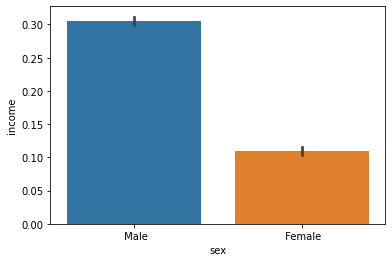

In [29]:
sns.barplot(x='sex', y = 'income', data=adult_train)

<AxesSubplot:xlabel='age', ylabel='income'>

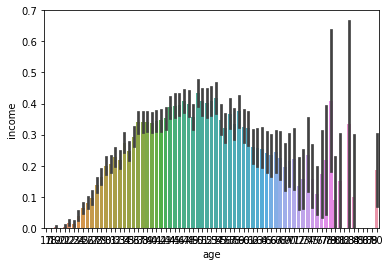

In [30]:
sns.barplot(x='age', y = 'income', data=adult_train)

<AxesSubplot:xlabel='education', ylabel='income'>

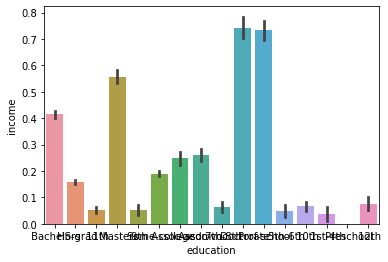

In [31]:
sns.barplot(x='education', y = 'income', data=adult_train)

<AxesSubplot:xlabel='marital-status', ylabel='income'>

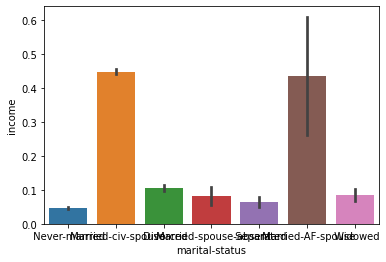

In [32]:
sns.barplot(x='marital-status', y = 'income', data=adult_train)

<AxesSubplot:xlabel='occupation', ylabel='income'>

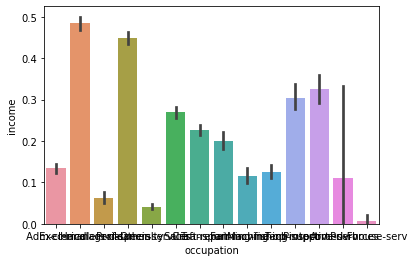

In [33]:
sns.barplot(x='occupation', y = 'income', data=adult_train)

<AxesSubplot:xlabel='relationship', ylabel='income'>

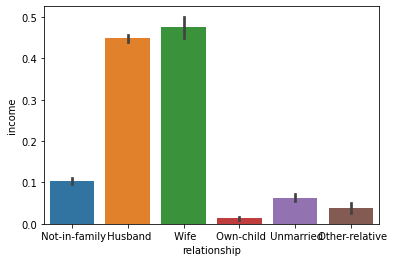

In [34]:
sns.barplot(x='relationship', y = 'income', data=adult_train)

<AxesSubplot:xlabel='race', ylabel='income'>

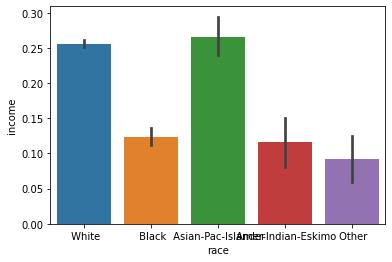

In [35]:
sns.barplot(x='race', y = 'income', data=adult_train)

## Data(Feature) Selection

여기부터 다시 진행

In [30]:
print('데이터 세트 Null 값 갯수 ',adult_train.isnull().sum().sum())

데이터 세트 Null 값 갯수  4262


## Data Replacement

NaN을 대체해야 한다!
1. <b>workclass</b>
2. <b>occupation</b>
3. <b>native-country</b>

In [35]:
adult_train['workclass'].fillna('Unknown',inplace=True)
adult_train['occupation'].fillna('Unknown',inplace=True)
adult_train['native-country'].fillna('Unknown',inplace=True)

In [36]:
adult_test['workclass'].fillna('Unknown',inplace=True)
adult_test['occupation'].fillna('Unknown',inplace=True)
adult_test['native-country'].fillna('Unknown',inplace=True)

In [37]:
print('데이터 세트 Null 값 갯수 ',adult_train.isnull().sum().sum())

데이터 세트 Null 값 갯수  0


In [38]:
print('데이터 세트 Null 값 갯수 ',adult_test.isnull().sum().sum())

데이터 세트 Null 값 갯수  0


object 데이터 -> integer label 데이터

In [39]:
from sklearn import preprocessing

def encode_features(dataDF):
    features = ['workclass', 'education', 'marital-status','occupation','relationship','race','sex','native-country','income']
    for feature in features:
        le = preprocessing.LabelEncoder()
        le = le.fit(dataDF[feature])
        dataDF[feature] = le.transform(dataDF[feature])
        
    return dataDF

adult_train = encode_features(adult_train)
adult_train.head(15)

adult_test = encode_features(adult_test)
adult_test.head(15) 

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,3,226802,1,7,4,6,3,2,1,0,0,40,37,0
1,38,3,89814,11,9,2,4,0,4,1,0,0,50,37,0
2,28,1,336951,7,12,2,10,0,4,1,0,0,40,37,1
3,44,3,160323,15,10,2,6,0,2,1,7688,0,40,37,1
4,18,8,103497,15,10,4,14,3,4,0,0,0,30,37,0
5,34,3,198693,0,6,4,7,1,4,1,0,0,30,37,0
6,29,8,227026,11,9,4,14,4,2,1,0,0,40,37,0
7,63,5,104626,14,15,2,9,0,4,1,3103,0,32,37,1
8,24,3,369667,15,10,4,7,4,4,0,0,0,40,37,0
9,55,3,104996,5,4,2,2,0,4,1,0,0,10,37,0


## Feature importance

dt_clf, rf_clf, lr_clf를 fit 한 이후에<br>
해당 tree가 어떤 feature를 중심으로 학습을 진행했는지를 확인하는 코드<br>
이 부분은 classifier를 선언, fit을 진행하고 나서 실행하면 정상 작동합니다.

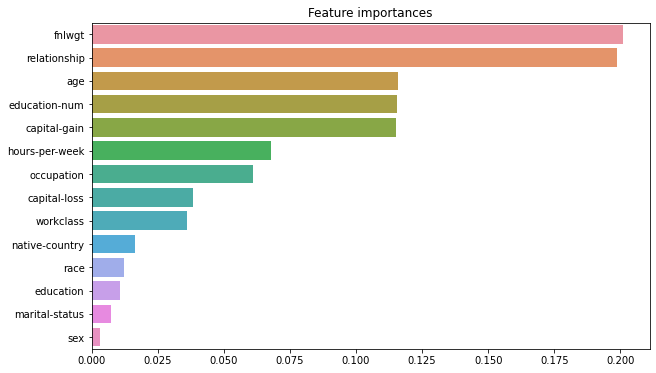

In [49]:
ftr_importances_values = dt_clf.feature_importances_
# Top 중요도로 정렬을 쉽게 하고, 시본(Seaborn)의 막대그래프로 쉽게 표현하기 위해 Series변환
ftr_importances = pd.Series(ftr_importances_values, index=train_x.columns  )
# 중요도값 순으로 Series를 정렬
ftr_top = ftr_importances.sort_values(ascending=False)
plt.figure(figsize=(10,6))
plt.title('Feature importances')
sns.barplot(x=ftr_top , y = ftr_top.index)
plt.show()

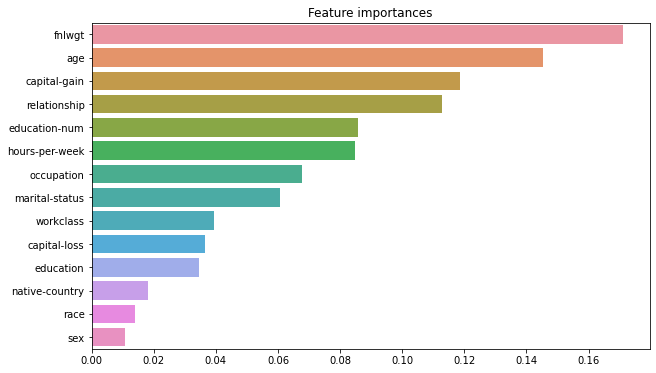

In [50]:
ftr_importances_values = rf_clf.feature_importances_
# Top 중요도로 정렬을 쉽게 하고, 시본(Seaborn)의 막대그래프로 쉽게 표현하기 위해 Series변환
ftr_importances = pd.Series(ftr_importances_values, index=train_x.columns  )
# 중요도값 순으로 Series를 정렬
ftr_top = ftr_importances.sort_values(ascending=False)
plt.figure(figsize=(10,6))
plt.title('Feature importances')
sns.barplot(x=ftr_top , y = ftr_top.index)
plt.show()

Feature: 0, Score: 0.00803
Feature: 1, Score: -0.02139
Feature: 2, Score: -0.00000
Feature: 3, Score: -0.01045
Feature: 4, Score: 0.02899
Feature: 5, Score: -0.03255
Feature: 6, Score: -0.01750
Feature: 7, Score: -0.03576
Feature: 8, Score: -0.00882
Feature: 9, Score: 0.00544
Feature: 10, Score: 0.00033
Feature: 11, Score: 0.00083
Feature: 12, Score: 0.03023
Feature: 13, Score: -0.07027


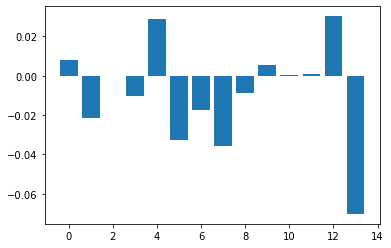

In [51]:
from matplotlib import pyplot
importance = lr_clf.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

std

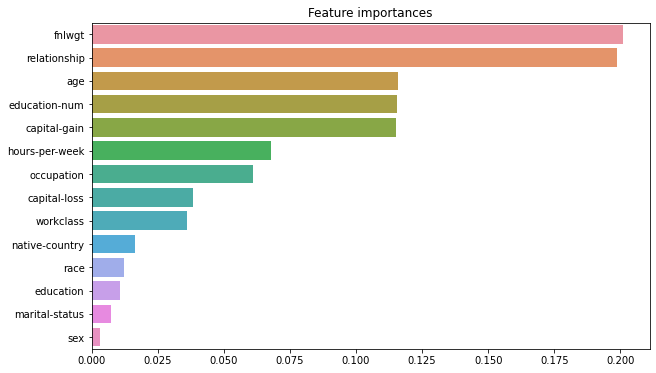

In [79]:
ftr_importances_values = std_dt_clf.feature_importances_
# Top 중요도로 정렬을 쉽게 하고, 시본(Seaborn)의 막대그래프로 쉽게 표현하기 위해 Series변환
ftr_importances = pd.Series(ftr_importances_values, index=train_x.columns  )
# 중요도값 순으로 Series를 정렬
ftr_top = ftr_importances.sort_values(ascending=False)
plt.figure(figsize=(10,6))
plt.title('Feature importances')
sns.barplot(x=ftr_top , y = ftr_top.index)
plt.show()

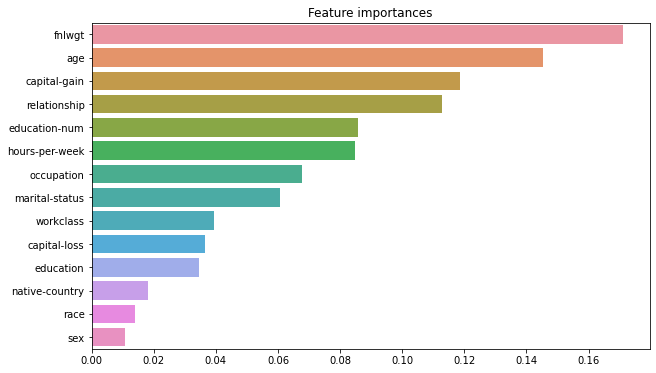

In [80]:
ftr_importances_values = std_rf_clf.feature_importances_
# Top 중요도로 정렬을 쉽게 하고, 시본(Seaborn)의 막대그래프로 쉽게 표현하기 위해 Series변환
ftr_importances = pd.Series(ftr_importances_values, index=train_x.columns  )
# 중요도값 순으로 Series를 정렬
ftr_top = ftr_importances.sort_values(ascending=False)
plt.figure(figsize=(10,6))
plt.title('Feature importances')
sns.barplot(x=ftr_top , y = ftr_top.index)
plt.show()

Feature: 0, Score: 0.48784
Feature: 1, Score: -0.17309
Feature: 2, Score: 0.05132
Feature: 3, Score: 0.05892
Feature: 4, Score: 0.85486
Feature: 5, Score: -0.34542
Feature: 6, Score: -0.01421
Feature: 7, Score: -0.19010
Feature: 8, Score: 0.10566
Feature: 9, Score: 0.43310
Feature: 10, Score: 2.32154
Feature: 11, Score: 0.27235
Feature: 12, Score: 0.36515
Feature: 13, Score: 0.00308


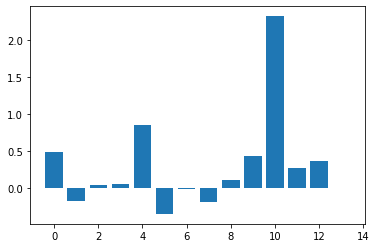

In [81]:
from matplotlib import pyplot
importance = std_lr_clf.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

mm

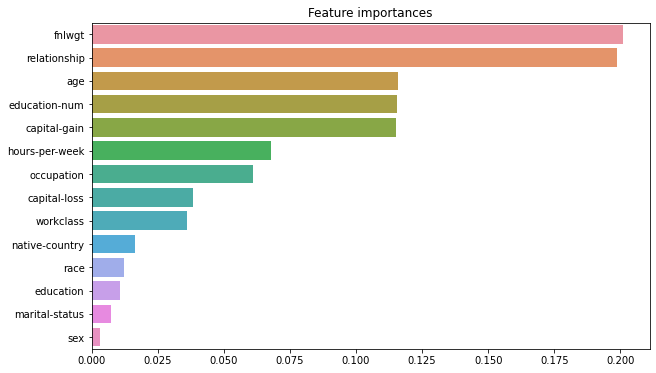

In [82]:
ftr_importances_values = mm_dt_clf.feature_importances_
# Top 중요도로 정렬을 쉽게 하고, 시본(Seaborn)의 막대그래프로 쉽게 표현하기 위해 Series변환
ftr_importances = pd.Series(ftr_importances_values, index=train_x.columns  )
# 중요도값 순으로 Series를 정렬
ftr_top = ftr_importances.sort_values(ascending=False)
plt.figure(figsize=(10,6))
plt.title('Feature importances')
sns.barplot(x=ftr_top , y = ftr_top.index)
plt.show()

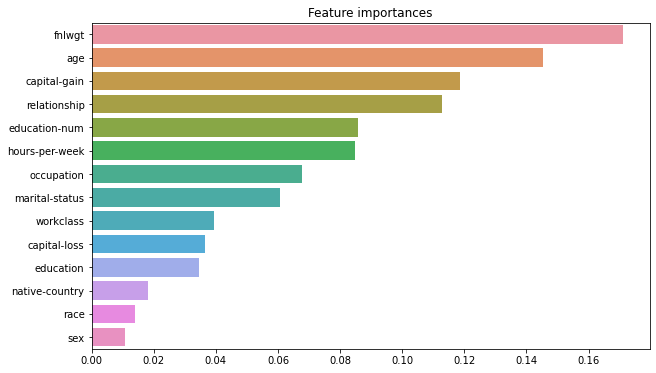

In [83]:
ftr_importances_values = mm_rf_clf.feature_importances_
# Top 중요도로 정렬을 쉽게 하고, 시본(Seaborn)의 막대그래프로 쉽게 표현하기 위해 Series변환
ftr_importances = pd.Series(ftr_importances_values, index=train_x.columns  )
# 중요도값 순으로 Series를 정렬
ftr_top = ftr_importances.sort_values(ascending=False)
plt.figure(figsize=(10,6))
plt.title('Feature importances')
sns.barplot(x=ftr_top , y = ftr_top.index)
plt.show()

Feature: 0, Score: 2.61423
Feature: 1, Score: -0.85169
Feature: 2, Score: 0.67701
Feature: 3, Score: 0.21734
Feature: 4, Score: 4.89932
Feature: 5, Score: -1.34355
Feature: 6, Score: -0.04550
Feature: 7, Score: -0.58225
Feature: 8, Score: 0.47547
Feature: 9, Score: 0.90014
Feature: 10, Score: 18.70362
Feature: 11, Score: 2.73057
Feature: 12, Score: 2.83657
Feature: 13, Score: 0.03151


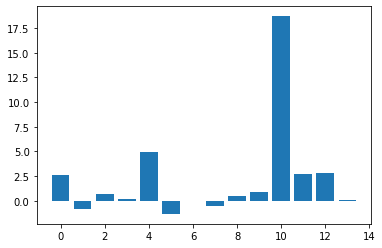

In [84]:
from matplotlib import pyplot
importance = mm_lr_clf.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

# No Drops

Make Train & Test Set

In [42]:
train_x = adult_train.iloc[:,:-1]
train_y = adult_train.iloc[:,-1]
test_x = adult_test.iloc[:,:-1]
test_y = adult_test.iloc[:,-1]

## PreProcessing with Scaler

### 1. StandardScaler

오류 났던 이유: object -> int64로 변환이 진행되지 않았기 때문

In [50]:
std_scaler = StandardScaler()
std_train_x = std_scaler.fit_transform(train_x)
std_test_x = std_scaler.fit_transform(test_x)

In [60]:
std_test_x

array([[-0.99412926, -0.2528865 ,  0.35347399, ..., -0.21806206,
        -0.03143184,  0.2480116 ],
       [-0.05541716, -0.2528865 , -0.94239062, ..., -0.21806206,
         0.7699177 ,  0.2480116 ],
       [-0.77750339, -1.49902606,  1.39544986, ..., -0.21806206,
        -0.03143184,  0.2480116 ],
       ...,
       [-0.05541716, -0.2528865 ,  1.75522095, ..., -0.21806206,
         0.7699177 ,  0.2480116 ],
       [ 0.37783458, -0.2528865 , -0.99842039, ..., -0.21806206,
        -0.03143184,  0.2480116 ],
       [-0.27204303,  0.37018328, -0.0689392 , ..., -0.21806206,
         1.57126723,  0.2480116 ]])

### 2. MinMaxScaler

In [58]:
mm_scaler = MinMaxScaler()
mm_train_x = mm_scaler.fit_transform(train_x)
mm_test_x = mm_scaler.fit_transform(test_x)

In [59]:
mm_test_x

array([[0.10958904, 0.375     , 0.14443012, ..., 0.        , 0.39795918,
        0.925     ],
       [0.28767123, 0.375     , 0.05167688, ..., 0.        , 0.5       ,
        0.925     ],
       [0.15068493, 0.125     , 0.21901093, ..., 0.        , 0.39795918,
        0.925     ],
       ...,
       [0.28767123, 0.375     , 0.24476203, ..., 0.        , 0.5       ,
        0.925     ],
       [0.36986301, 0.375     , 0.04766648, ..., 0.        , 0.39795918,
        0.925     ],
       [0.24657534, 0.5       , 0.11419533, ..., 0.        , 0.60204082,
        0.925     ]])

## No PreProcessing Scaler

### Decision Tree & Random Forest & Logistic Regression

In [40]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

dt_clf = DecisionTreeClassifier(random_state=156)
rf_clf = RandomForestClassifier(random_state=156)
lr_clf = LogisticRegression()

In [43]:
dt_clf.fit(train_x,train_y)
rf_clf.fit(train_x,train_y)
lr_clf.fit(train_x,train_y)

c:\users\ad\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [45]:
pred_dt = dt_clf.predict(test_x)
pred_rf = rf_clf.predict(test_x)
pred_lr = lr_clf.predict(test_x)

In [46]:
pred_dt_proba = dt_clf.predict_proba(test_x)[:, 1]
pred_rf_proba = rf_clf.predict_proba(test_x)[:, 1]
pred_lr_proba = lr_clf.predict_proba(test_x)[:, 1]

## PreProcessing Standard Scaler

### Decision Tree & Random Forest & Logistic Regression

In [61]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

std_dt_clf = DecisionTreeClassifier(random_state=156)
std_rf_clf = RandomForestClassifier(random_state=156)
std_lr_clf = LogisticRegression()

In [62]:
std_dt_clf.fit(std_train_x,train_y)
std_rf_clf.fit(std_train_x,train_y)
std_lr_clf.fit(std_train_x,train_y)

LogisticRegression()

In [63]:
std_pred_dt = std_dt_clf.predict(std_test_x)
std_pred_rf = std_rf_clf.predict(std_test_x)
std_pred_lr = std_lr_clf.predict(std_test_x)

In [64]:
print(std_dt_clf.predict_proba(std_test_x))

[[1. 0.]
 [1. 0.]
 [0. 1.]
 ...
 [0. 1.]
 [1. 0.]
 [1. 0.]]


In [65]:
std_pred_dt_proba = std_dt_clf.predict_proba(std_test_x)[:, 1]
std_pred_rf_proba = std_rf_clf.predict_proba(std_test_x)[:, 1]
std_pred_lr_proba = std_lr_clf.predict_proba(std_test_x)[:, 1]

In [66]:
std_pred_lr_proba

array([0.01960946, 0.20803367, 0.32573623, ..., 0.52165846, 0.78340931,
       0.52294596])

## PreProcessing MinMax Scaler

### Decision Tree & Random Forest & Logistic Regression

In [67]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

mm_dt_clf = DecisionTreeClassifier(random_state=156)
mm_rf_clf = RandomForestClassifier(random_state=156)
mm_lr_clf = LogisticRegression()

In [68]:
mm_dt_clf.fit(mm_train_x,train_y)
mm_rf_clf.fit(mm_train_x,train_y)
mm_lr_clf.fit(mm_train_x,train_y)

LogisticRegression()

In [69]:
mm_pred_dt = mm_dt_clf.predict(mm_test_x)
mm_pred_rf = mm_rf_clf.predict(mm_test_x)
mm_pred_lr = mm_lr_clf.predict(mm_test_x)

In [70]:
mm_pred_dt_proba = mm_dt_clf.predict_proba(mm_test_x)[:, 1]
mm_pred_rf_proba = mm_rf_clf.predict_proba(mm_test_x)[:, 1]
mm_pred_lr_proba = mm_lr_clf.predict_proba(mm_test_x)[:, 1]

## 평가

In [71]:
def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)
    # ROC-AUC 추가 
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)
    # ROC-AUC print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\
    F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

### 1. Decision Tree

In [72]:
print('no scaler')
get_clf_eval(test_y, pred_dt, pred_dt_proba)
print('standard scaler')
get_clf_eval(test_y, std_pred_dt, std_pred_dt_proba)
print('minmax scaler')
get_clf_eval(test_y, mm_pred_dt, pred_dt_proba)


no scaler
오차 행렬
[[10839  1596]
 [ 1496  2350]]
정확도: 0.8101, 정밀도: 0.5955, 재현율: 0.6110,    F1: 0.6032, AUC:0.7413
standard scaler
오차 행렬
[[10831  1604]
 [ 1536  2310]]
정확도: 0.8071, 정밀도: 0.5902, 재현율: 0.6006,    F1: 0.5954, AUC:0.7358
minmax scaler
오차 행렬
[[10796  1639]
 [ 1625  2221]]
정확도: 0.7995, 정밀도: 0.5754, 재현율: 0.5775,    F1: 0.5764, AUC:0.7413



### 2. Random Forest

In [73]:
print('no scaler')
get_clf_eval(test_y, pred_rf, pred_rf_proba)
print('standard scaler')
get_clf_eval(test_y, std_pred_rf, std_pred_rf_proba)
print('minmax scaler')
get_clf_eval(test_y, mm_pred_rf, mm_pred_rf_proba)

no scaler
오차 행렬
[[11601   834]
 [ 1509  2337]]
정확도: 0.8561, 정밀도: 0.7370, 재현율: 0.6076,    F1: 0.6661, AUC:0.9050
standard scaler
오차 행렬
[[11561   874]
 [ 1538  2308]]
정확도: 0.8519, 정밀도: 0.7253, 재현율: 0.6001,    F1: 0.6568, AUC:0.9019
minmax scaler
오차 행렬
[[11515   920]
 [ 1582  2264]]
정확도: 0.8463, 정밀도: 0.7111, 재현율: 0.5887,    F1: 0.6441, AUC:0.9050


In [78]:
thresholds = [0.3 , 0.33 ,0.36,0.39, 0.42 , 0.45 ,0.48, 0.50]
get_eval_by_threshold(test_y, pred_rf_proba.reshape(-1,1), thresholds )

임곗값: 0.3
오차 행렬
[[10490  1945]
 [  847  2999]]
정확도: 0.8285, 정밀도: 0.6066, 재현율: 0.7798,    F1: 0.6824, AUC:0.9050
임곗값: 0.33
오차 행렬
[[10717  1718]
 [  939  2907]]
정확도: 0.8368, 정밀도: 0.6285, 재현율: 0.7559,    F1: 0.6863, AUC:0.9050
임곗값: 0.36
오차 행렬
[[10916  1519]
 [ 1041  2805]]
정확도: 0.8428, 정밀도: 0.6487, 재현율: 0.7293,    F1: 0.6867, AUC:0.9050
임곗값: 0.39
오차 행렬
[[11090  1345]
 [ 1149  2697]]
정확도: 0.8468, 정밀도: 0.6672, 재현율: 0.7012,    F1: 0.6838, AUC:0.9050
임곗값: 0.42
오차 행렬
[[11244  1191]
 [ 1266  2580]]
정확도: 0.8491, 정밀도: 0.6842, 재현율: 0.6708,    F1: 0.6774, AUC:0.9050
임곗값: 0.45
오차 행렬
[[11382  1053]
 [ 1377  2469]]
정확도: 0.8507, 정밀도: 0.7010, 재현율: 0.6420,    F1: 0.6702, AUC:0.9050
임곗값: 0.48
오차 행렬
[[11510   925]
 [ 1459  2387]]
정확도: 0.8536, 정밀도: 0.7207, 재현율: 0.6206,    F1: 0.6669, AUC:0.9050
임곗값: 0.5
오차 행렬
[[11601   834]
 [ 1509  2337]]
정확도: 0.8561, 정밀도: 0.7370, 재현율: 0.6076,    F1: 0.6661, AUC:0.9050


In [79]:
thresholds = [0.3 , 0.33 ,0.36,0.39, 0.42 , 0.45 ,0.48, 0.50]
get_eval_by_threshold(test_y, std_pred_rf_proba.reshape(-1,1), thresholds )

임곗값: 0.3
오차 행렬
[[10453  1982]
 [  866  2980]]
정확도: 0.8251, 정밀도: 0.6006, 재현율: 0.7748,    F1: 0.6767, AUC:0.9019
임곗값: 0.33
오차 행렬
[[10675  1760]
 [  967  2879]]
정확도: 0.8325, 정밀도: 0.6206, 재현율: 0.7486,    F1: 0.6786, AUC:0.9019
임곗값: 0.36
오차 행렬
[[10871  1564]
 [ 1068  2778]]
정확도: 0.8383, 정밀도: 0.6398, 재현율: 0.7223,    F1: 0.6786, AUC:0.9019
임곗값: 0.39
오차 행렬
[[11044  1391]
 [ 1171  2675]]
정확도: 0.8426, 정밀도: 0.6579, 재현율: 0.6955,    F1: 0.6762, AUC:0.9019
임곗값: 0.42
오차 행렬
[[11214  1221]
 [ 1272  2574]]
정확도: 0.8469, 정밀도: 0.6783, 재현율: 0.6693,    F1: 0.6737, AUC:0.9019
임곗값: 0.45
오차 행렬
[[11333  1102]
 [ 1389  2457]]
정확도: 0.8470, 정밀도: 0.6904, 재현율: 0.6388,    F1: 0.6636, AUC:0.9019
임곗값: 0.48
오차 행렬
[[11477   958]
 [ 1475  2371]]
정확도: 0.8506, 정밀도: 0.7122, 재현율: 0.6165,    F1: 0.6609, AUC:0.9019
임곗값: 0.5
오차 행렬
[[11561   874]
 [ 1538  2308]]
정확도: 0.8519, 정밀도: 0.7253, 재현율: 0.6001,    F1: 0.6568, AUC:0.9019


In [80]:
thresholds = [0.3 , 0.33 ,0.36,0.39, 0.42 , 0.45 ,0.48, 0.50]
get_eval_by_threshold(test_y, mm_pred_rf_proba.reshape(-1,1), thresholds )

임곗값: 0.3
오차 행렬
[[10391  2044]
 [  887  2959]]
정확도: 0.8200, 정밀도: 0.5914, 재현율: 0.7694,    F1: 0.6688, AUC:0.8974
임곗값: 0.33
오차 행렬
[[10620  1815]
 [  986  2860]]
정확도: 0.8280, 정밀도: 0.6118, 재현율: 0.7436,    F1: 0.6713, AUC:0.8974
임곗값: 0.36
오차 행렬
[[10828  1607]
 [ 1085  2761]]
정확도: 0.8347, 정밀도: 0.6321, 재현율: 0.7179,    F1: 0.6723, AUC:0.8974
임곗값: 0.39
오차 행렬
[[10995  1440]
 [ 1193  2653]]
정확도: 0.8383, 정밀도: 0.6482, 재현율: 0.6898,    F1: 0.6683, AUC:0.8974
임곗값: 0.42
오차 행렬
[[11141  1294]
 [ 1301  2545]]
정확도: 0.8406, 정밀도: 0.6629, 재현율: 0.6617,    F1: 0.6623, AUC:0.8974
임곗값: 0.45
오차 행렬
[[11285  1150]
 [ 1419  2427]]
정확도: 0.8422, 정밀도: 0.6785, 재현율: 0.6310,    F1: 0.6539, AUC:0.8974
임곗값: 0.48
오차 행렬
[[11421  1014]
 [ 1518  2328]]
정확도: 0.8445, 정밀도: 0.6966, 재현율: 0.6053,    F1: 0.6477, AUC:0.8974
임곗값: 0.5
오차 행렬
[[11515   920]
 [ 1582  2264]]
정확도: 0.8463, 정밀도: 0.7111, 재현율: 0.5887,    F1: 0.6441, AUC:0.8974


### 3.Logistic Regression

In [74]:
print('no scaler')
get_clf_eval(test_y, pred_lr, pred_lr_proba)
print('standard scaler')
get_clf_eval(test_y, std_pred_lr, std_pred_lr_proba)
print('minmax scaler')
get_clf_eval(test_y, mm_pred_lr, pred_lr_proba)

no scaler
오차 행렬
[[11684   751]
 [ 2649  1197]]
정확도: 0.7912, 정밀도: 0.6145, 재현율: 0.3112,    F1: 0.4132, AUC:0.7584
standard scaler
오차 행렬
[[11700   735]
 [ 2109  1737]]
정확도: 0.8253, 정밀도: 0.7027, 재현율: 0.4516,    F1: 0.5499, AUC:0.8527
minmax scaler
오차 행렬
[[11710   725]
 [ 2146  1700]]
정확도: 0.8237, 정밀도: 0.7010, 재현율: 0.4420,    F1: 0.5422, AUC:0.7584


In [75]:
from sklearn.preprocessing import Binarizer

def get_eval_by_threshold(y_test , pred_proba_c1, thresholds):
    # thresholds 리스트 객체내의 값을 차례로 iteration하면서 Evaluation 수행.
    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_c1) 
        custom_predict = binarizer.transform(pred_proba_c1)
        print('임곗값:',custom_threshold)
        get_clf_eval(y_test , custom_predict, pred_proba_c1)

In [77]:
thresholds = [0.3 , 0.33 ,0.36,0.39, 0.42 , 0.45 ,0.48, 0.50]
get_eval_by_threshold(test_y, pred_lr_proba.reshape(-1,1), thresholds )

임곗값: 0.3
오차 행렬
[[10476  1959]
 [ 2186  1660]]
정확도: 0.7454, 정밀도: 0.4587, 재현율: 0.4316,    F1: 0.4447, AUC:0.7584
임곗값: 0.33
오차 행렬
[[10781  1654]
 [ 2337  1509]]
정확도: 0.7549, 정밀도: 0.4771, 재현율: 0.3924,    F1: 0.4306, AUC:0.7584
임곗값: 0.36
오차 행렬
[[11024  1411]
 [ 2429  1417]]
정확도: 0.7641, 정밀도: 0.5011, 재현율: 0.3684,    F1: 0.4246, AUC:0.7584
임곗값: 0.39
오차 행렬
[[11209  1226]
 [ 2498  1348]]
정확도: 0.7713, 정밀도: 0.5237, 재현율: 0.3505,    F1: 0.4199, AUC:0.7584
임곗값: 0.42
오차 행렬
[[11351  1084]
 [ 2543  1303]]
정확도: 0.7772, 정밀도: 0.5459, 재현율: 0.3388,    F1: 0.4181, AUC:0.7584
임곗값: 0.45
오차 행렬
[[11478   957]
 [ 2586  1260]]
정확도: 0.7824, 정밀도: 0.5683, 재현율: 0.3276,    F1: 0.4156, AUC:0.7584
임곗값: 0.48
오차 행렬
[[11615   820]
 [ 2624  1222]]
정확도: 0.7885, 정밀도: 0.5984, 재현율: 0.3177,    F1: 0.4151, AUC:0.7584
임곗값: 0.5
오차 행렬
[[11684   751]
 [ 2649  1197]]
정확도: 0.7912, 정밀도: 0.6145, 재현율: 0.3112,    F1: 0.4132, AUC:0.7584
